In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
import numpy as np
import random

series = np.zeros(100)

n = 100000

expected = np.full(100, n/100)

for i in range(n):
    series[random.randint(0, 99)] += 1
    
rss = np.sum((expected-series)**2)

print(rss)

87626.0


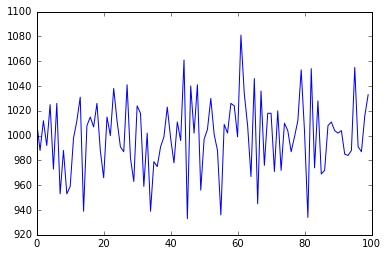

In [51]:
plt.plot(series)
plt.show()

In [76]:
def draw_token_series_rss(n: int, bins: int=100):
    
    """
    Given a total count N and a bin size, randomly draw a series
    and calculate the RSS against the uniform.
    """
    
    expected = np.full(bins, n/bins)
    
    observed = np.zeros(bins)
    
    for _ in range(n):
        observed[random.randint(0, bins-1)] += 1
        
    return np.sum((expected-observed)**2)

In [77]:
def draw_rss_std(n: int, samples: int=1000, bins: int=100):
    
    return np.std([
        draw_token_series_rss(n, bins)
        for _ in range(samples)
    ])

In [97]:
X = range(0, 1000, 100)

Y100 = [draw_rss_std(n, bins=100) for n in X]
Y200 = [draw_rss_std(n, bins=200) for n in X]
Y300 = [draw_rss_std(n, bins=300) for n in X]
Y400 = [draw_rss_std(n, bins=400) for n in X]
Y500 = [draw_rss_std(n, bins=500) for n in X]

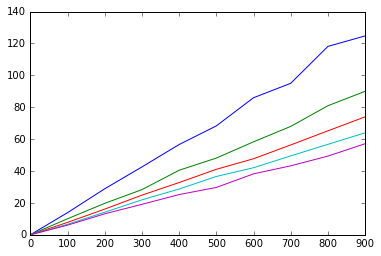

In [98]:
plt.plot(X, Y100)
plt.plot(X, Y200)
plt.plot(X, Y300)
plt.plot(X, Y400)
plt.plot(X, Y500)
plt.show()

In [106]:
data = [
    (100, x, y)
    for x, y in zip(X, Y100)
] + [
    (200, x, y)
    for x, y in zip(X, Y200)
] + [
    (300, x, y)
    for x, y in zip(X, Y300)
] + [
    (400, x, y)
    for x, y in zip(X, Y400)
] + [
    (500, x, y)
    for x, y in zip(X, Y500)
]

data

[(100, 0, 0.0),
 (100, 100, 13.887154352134205),
 (100, 200, 28.867127047906934),
 (100, 300, 42.564946892954062),
 (100, 400, 56.628507838367064),
 (100, 500, 68.312377912059247),
 (100, 600, 85.979757408357472),
 (100, 700, 95.027697520249333),
 (100, 800, 118.16901453426782),
 (100, 900, 124.75441588977922),
 (200, 0, 0.0),
 (200, 100, 10.057473042469466),
 (200, 200, 19.732846120111514),
 (200, 300, 28.333491066227616),
 (200, 400, 40.489919733187918),
 (200, 500, 48.119783873163847),
 (200, 600, 58.331000300012001),
 (200, 700, 67.991036585714738),
 (200, 800, 80.968630938160246),
 (200, 900, 90.000097777724662),
 (300, 0, 0.0),
 (300, 100, 7.7820264712991039),
 (300, 200, 16.110805194030494),
 (300, 300, 24.87258120903418),
 (300, 400, 32.766310442282034),
 (300, 500, 41.073199826650956),
 (300, 600, 47.708008510102367),
 (300, 700, 56.366937117427263),
 (300, 800, 65.220097393364881),
 (300, 900, 73.999777702368803),
 (400, 0, 0.0),
 (400, 100, 6.5833924385532416),
 (400, 200, 1

In [110]:
import pandas as pd

df = pd.DataFrame(data, columns=('bins', 'n', 'std'))

In [111]:
from patsy import dmatrices

y, x = dmatrices(
    'std ~ n + bins',
    data=df,
    return_type='dataframe',
)

In [112]:
import statsmodels.api as sm

mod = sm.OLS(y, x)

res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    std   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     230.9
Date:                Tue, 25 Oct 2016   Prob (F-statistic):           4.91e-25
Time:                        23:11:44   Log-Likelihood:                -181.64
No. Observations:                  50   AIC:                             369.3
Df Residuals:                      47   BIC:                             375.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     24.7923      3.765      6.585      0.000        17.218    32.366
n              0.0911      0.005     19.609      0.000         0.082     0.100
bins          -0.0830      0.009     -8.790      0.000        -0.102    -0.064
==============================================================================
Omnibus:                       14.716   Durbin-Watson:                   0.643
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.218
Skew:                           1.209   Prob(JB):                     0.000301
Kurtosis:                       4.392   Cond. No.                     1.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
24.79 + (700 * 0.0911) + (200 * -0.0830)

71.96000000000001